In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imputation3 as imp

In [2]:
pathTrainData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/train.csv'
pathTestData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/test.csv'
helpTestDance = '../html2023-spring-final-project-stage-2/test_partial_answer.csv'

In [3]:
train = pd.read_csv(pathTrainData)
test = pd.read_csv(pathTestData)
partialAnswer = pd.read_csv(helpTestDance)

Join train and test in total

In [4]:
total = pd.concat((train, test), axis=0)

Merge data Danceability by id

In [5]:
total.loc[total['id'].isin(partialAnswer['id']), 'Danceability'] = partialAnswer['Danceability']

In [6]:
total.set_index('id', inplace= True)

In [7]:
total.drop(columns=['Uri', 'Url_youtube', 'Description', 'Title', 'Artist', 'Album', 'Track', "official_video", "Licensed"], inplace=True)

In [8]:
categoryList = ['Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']

In [9]:
def is_nan(x):
    if type(x) == float:
        if np.isnan(x):
            return True
        else:
            return False

def LabelEncoding(data):
    k = data.unique()
    nlabel = {}
    for i, label in enumerate(k):
        if not is_nan(label):
            nlabel[label] = i#f'{i}'
    return nlabel

In [10]:
def categoricalData(data, list):
    labels = {}
    for i in list:
        if i != 'Key':
            labels[i] = LabelEncoding(data[i])
    return labels

In [11]:
labels = categoricalData(total, categoryList)

In [12]:
for i in categoryList:
    if i != 'Key':
        total[i] = total[i].replace(labels[i])

In [13]:
total.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Views', 'Likes', 'Stream', 'Album_type', 'Url_spotify',
       'Comments', 'Channel', 'Composer'],
      dtype='object')

EXTRACT NUMERICAL DATA

In [14]:
# category = ['Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']
category = ['Key', 'Album_type', 'Composer']
categoryAsRegression = [ 'Url_spotify', 'Channel']

In [15]:
totalNumerical = total.loc[:, ['Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Views', 'Likes', 'Stream', 'Comments', 'Duration_ms', 'Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']]

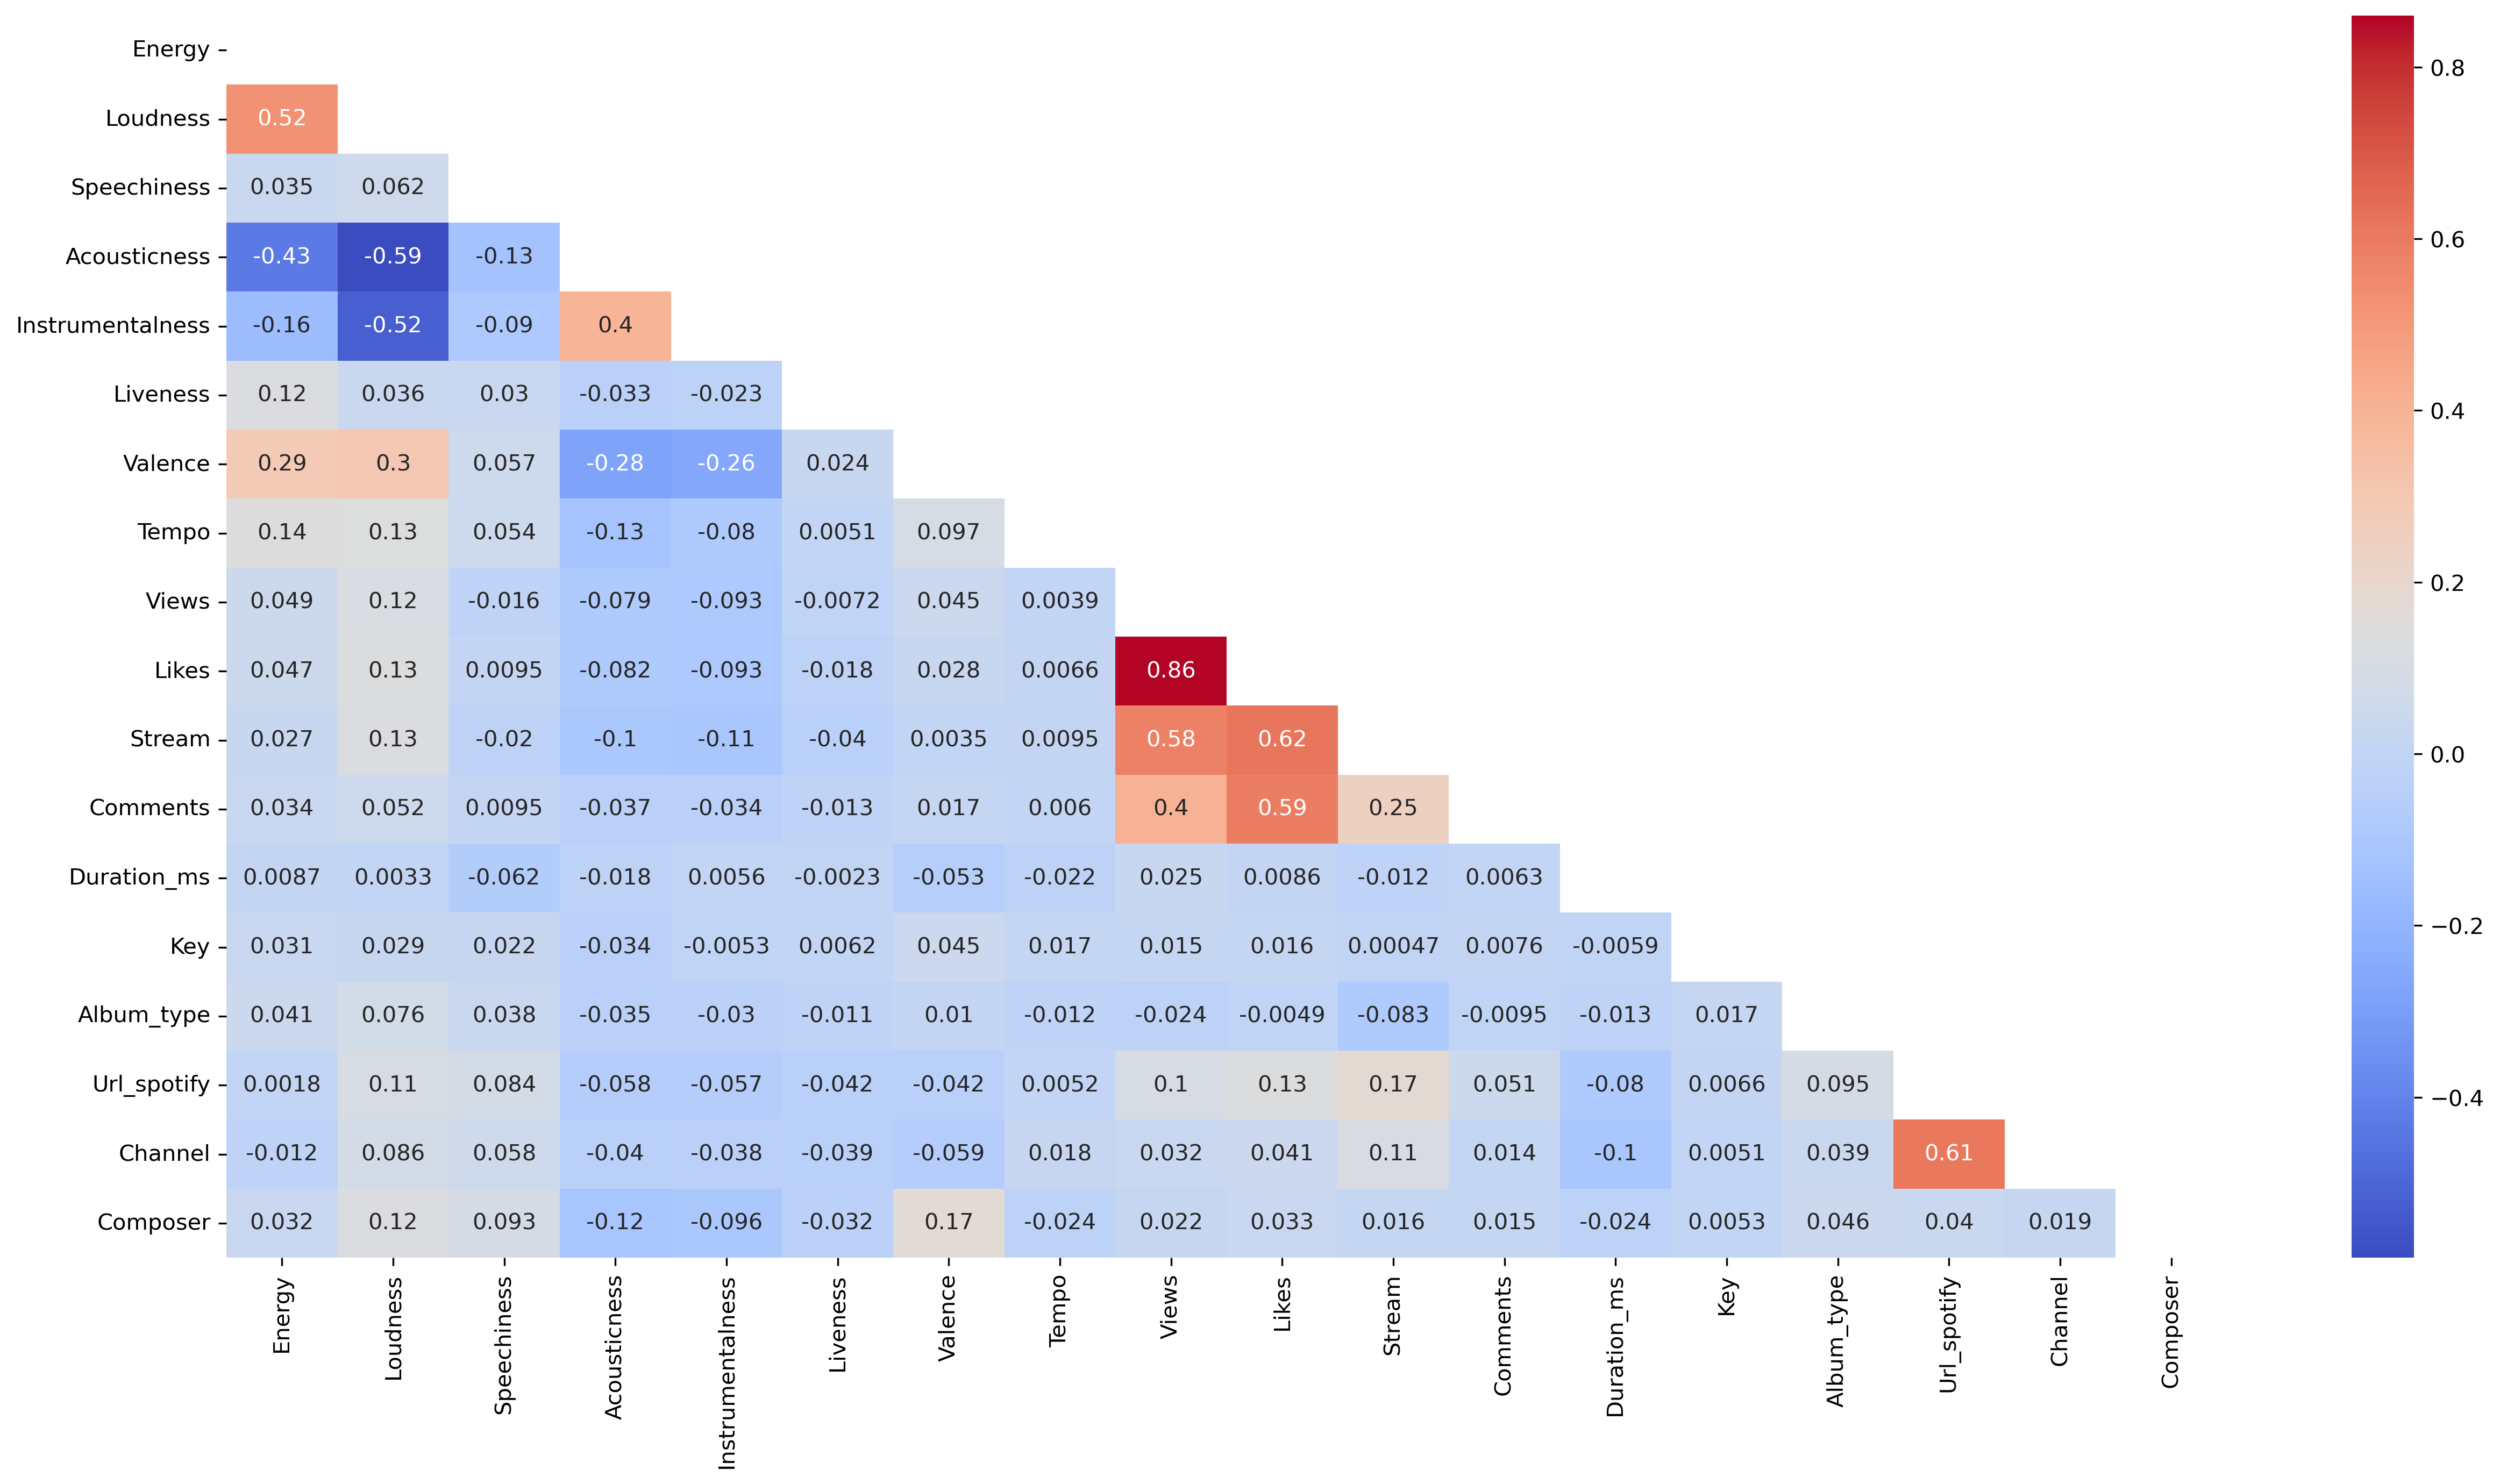

In [16]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
mask = np.triu(np.ones_like(totalNumerical.corr()))
dataplot = sns.heatmap(totalNumerical.corr(), cmap="coolwarm", annot=True, mask=mask)

In [17]:
totalNumerical.isnull().sum(0)

Energy              3523
Loudness            3523
Speechiness         3523
Acousticness        3523
Instrumentalness    3523
Liveness            3523
Valence             3523
Tempo               3523
Views               3523
Likes               3523
Stream              3523
Comments            3523
Duration_ms         3523
Key                 3523
Album_type          3523
Url_spotify         3523
Channel             3523
Composer            3523
dtype: int64

In [18]:
impute = imp.testImputate(totalNumerical, category, categoryAsRegression)

In [19]:
impute.mice( n=5, savePredictions=True)

___ Processing Energy ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's rmse: 0.176362
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[64]	valid_0's rmse: 0.177014
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[65]	valid_0's rmse: 0.174562
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[65]	valid_0's rmse: 0.177034
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[29]	valid_0's rmse: 0.178598
___ Processing Loudness ___
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's rmse: 2.67227
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[16]	valid_0's rmse: 2.59946
Training until validation scores don't improve for 5 rounds
Early stoppin

TEST IMOUTE NEW DATA

In [20]:
pathTestData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/test.csv'
testND = pd.read_csv(pathTestData)
testND.set_index('id', inplace= True)
testND.drop(columns=['Uri', 'Url_youtube', 'Description', 'Title', 'Artist', 'Album', 'Track', "official_video", "Licensed"], inplace=True)

for i in categoryList:
    if i != 'Key':
        testND[i] = testND[i].replace(labels[i])

totalNewData = testND.loc[:, ['Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Views', 'Likes', 'Stream', 'Comments', 'Duration_ms', 'Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']]

In [21]:
totalNewData

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,Likes,Stream,Comments,Duration_ms,Key,Album_type,Url_spotify,Channel,Composer
id,,,,,,,,,,,,,,,,,,
17170,0.350403,-6.679000,0.177000,5.842771e-07,0.002330,0.230346,NaN,138.559000,6.935552e+08,6.220896e+06,1.040235e+09,169907.0,222640.000000,6.0,0.0,1824.0,1207.0,3.0
17171,0.347429,-5.815000,0.030200,NaN,0.000687,0.000099,0.852000,92.761000,7.201164e+07,NaN,3.100837e+08,31003.0,200173.000000,8.0,NaN,1824.0,1207.0,1.0
17172,0.786330,-3.930000,0.052200,7.676563e-05,NaN,0.001561,0.551000,108.014000,8.435055e+06,2.821420e+05,6.306347e+07,7399.0,215150.000000,1.0,2.0,1824.0,1207.0,1.0
17173,0.403583,-5.810000,0.026000,3.442951e-15,0.509000,0.000262,0.578000,120.423000,NaN,1.788577e+06,4.346636e+08,55229.0,233867.000000,2.0,0.0,1824.0,1207.0,5.0
17174,0.334255,-8.627000,0.171000,1.619428e-05,0.000000,0.000340,0.525000,167.953000,6.184810e+08,6.197318e+06,6.172597e+08,155930.0,340920.000000,NaN,NaN,NaN,1207.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,-6.366894,0.045451,3.176921e-01,0.006016,0.001642,0.160253,72.136829,9.636781e+06,5.807853e+04,1.750041e+07,168.0,233721.956648,7.0,0.0,209.0,2970.0,6.0
23481,0.318585,-4.148566,0.073000,7.419596e-03,0.000817,0.008843,0.614366,NaN,4.572846e+07,7.227992e+04,1.365601e+07,448.0,138726.388393,10.0,2.0,1631.0,4731.0,7.0
23482,0.426223,-5.807545,0.072906,6.617082e-01,0.898308,0.000662,0.087281,87.969239,-3.451740e+06,2.305163e+04,1.849094e+07,NaN,185842.047750,5.0,2.0,1937.0,5845.0,4.0


In [22]:
totalNewDataCopy = totalNewData.copy()

In [23]:
totalNewDataCopy.columns

Index(['Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Views', 'Likes', 'Stream', 'Comments',
       'Duration_ms', 'Key', 'Album_type', 'Url_spotify', 'Channel',
       'Composer'],
      dtype='object')

In [24]:
a  = impute.miceTrainedModel(totalNewDataCopy, savePredictions=True)

___ Processing Energy ___
___ Processing Loudness ___
___ Processing Speechiness ___
___ Processing Acousticness ___
___ Processing Instrumentalness ___
___ Processing Liveness ___
___ Processing Valence ___
___ Processing Tempo ___
___ Processing Views ___
___ Processing Likes ___
___ Processing Stream ___
___ Processing Comments ___
___ Processing Duration_ms ___
___ Processing Key ___
___ Processing Album_type ___
___ Processing Url_spotify ___
___ Processing Channel ___
___ Processing Composer ___
-- Imputation Done --


In [25]:
a

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,Likes,Stream,Comments,Duration_ms,Key,Album_type,Url_spotify,Channel,Composer
id,,,,,,,,,,,,,,,,,,
17170,0.350403,-6.679000,0.177000,5.842771e-07,0.002330,0.230346,0.503058,138.559000,6.935552e+08,6.220896e+06,1.040235e+09,169907.000000,222640.000000,6.0,0.0,1824.0,1207.0,3.0
17171,0.347429,-5.815000,0.030200,3.225859e-02,0.000687,0.000099,0.852000,92.761000,7.201164e+07,8.461311e+05,3.100837e+08,31003.000000,200173.000000,8.0,0.0,1824.0,1207.0,1.0
17172,0.786330,-3.930000,0.052200,7.676563e-05,0.020704,0.001561,0.551000,108.014000,8.435055e+06,2.821420e+05,6.306347e+07,7399.000000,215150.000000,1.0,2.0,1824.0,1207.0,1.0
17173,0.403583,-5.810000,0.026000,3.442951e-15,0.509000,0.000262,0.578000,120.423000,2.333321e+08,1.788577e+06,4.346636e+08,55229.000000,233867.000000,2.0,0.0,1824.0,1207.0,5.0
17174,0.334255,-8.627000,0.171000,1.619428e-05,0.000000,0.000340,0.525000,167.953000,6.184810e+08,6.197318e+06,6.172597e+08,155930.000000,340920.000000,11.0,0.0,1223.0,1207.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,-6.366894,0.045451,3.176921e-01,0.006016,0.001642,0.160253,72.136829,9.636781e+06,5.807853e+04,1.750041e+07,168.000000,233721.956648,7.0,0.0,209.0,2970.0,6.0
23481,0.318585,-4.148566,0.073000,7.419596e-03,0.000817,0.008843,0.614366,118.522961,4.572846e+07,7.227992e+04,1.365601e+07,448.000000,138726.388393,10.0,2.0,1631.0,4731.0,7.0
23482,0.426223,-5.807545,0.072906,6.617082e-01,0.898308,0.000662,0.087281,87.969239,-3.451740e+06,2.305163e+04,1.849094e+07,239750.159018,185842.047750,5.0,2.0,1937.0,5845.0,4.0


<AxesSubplot:>

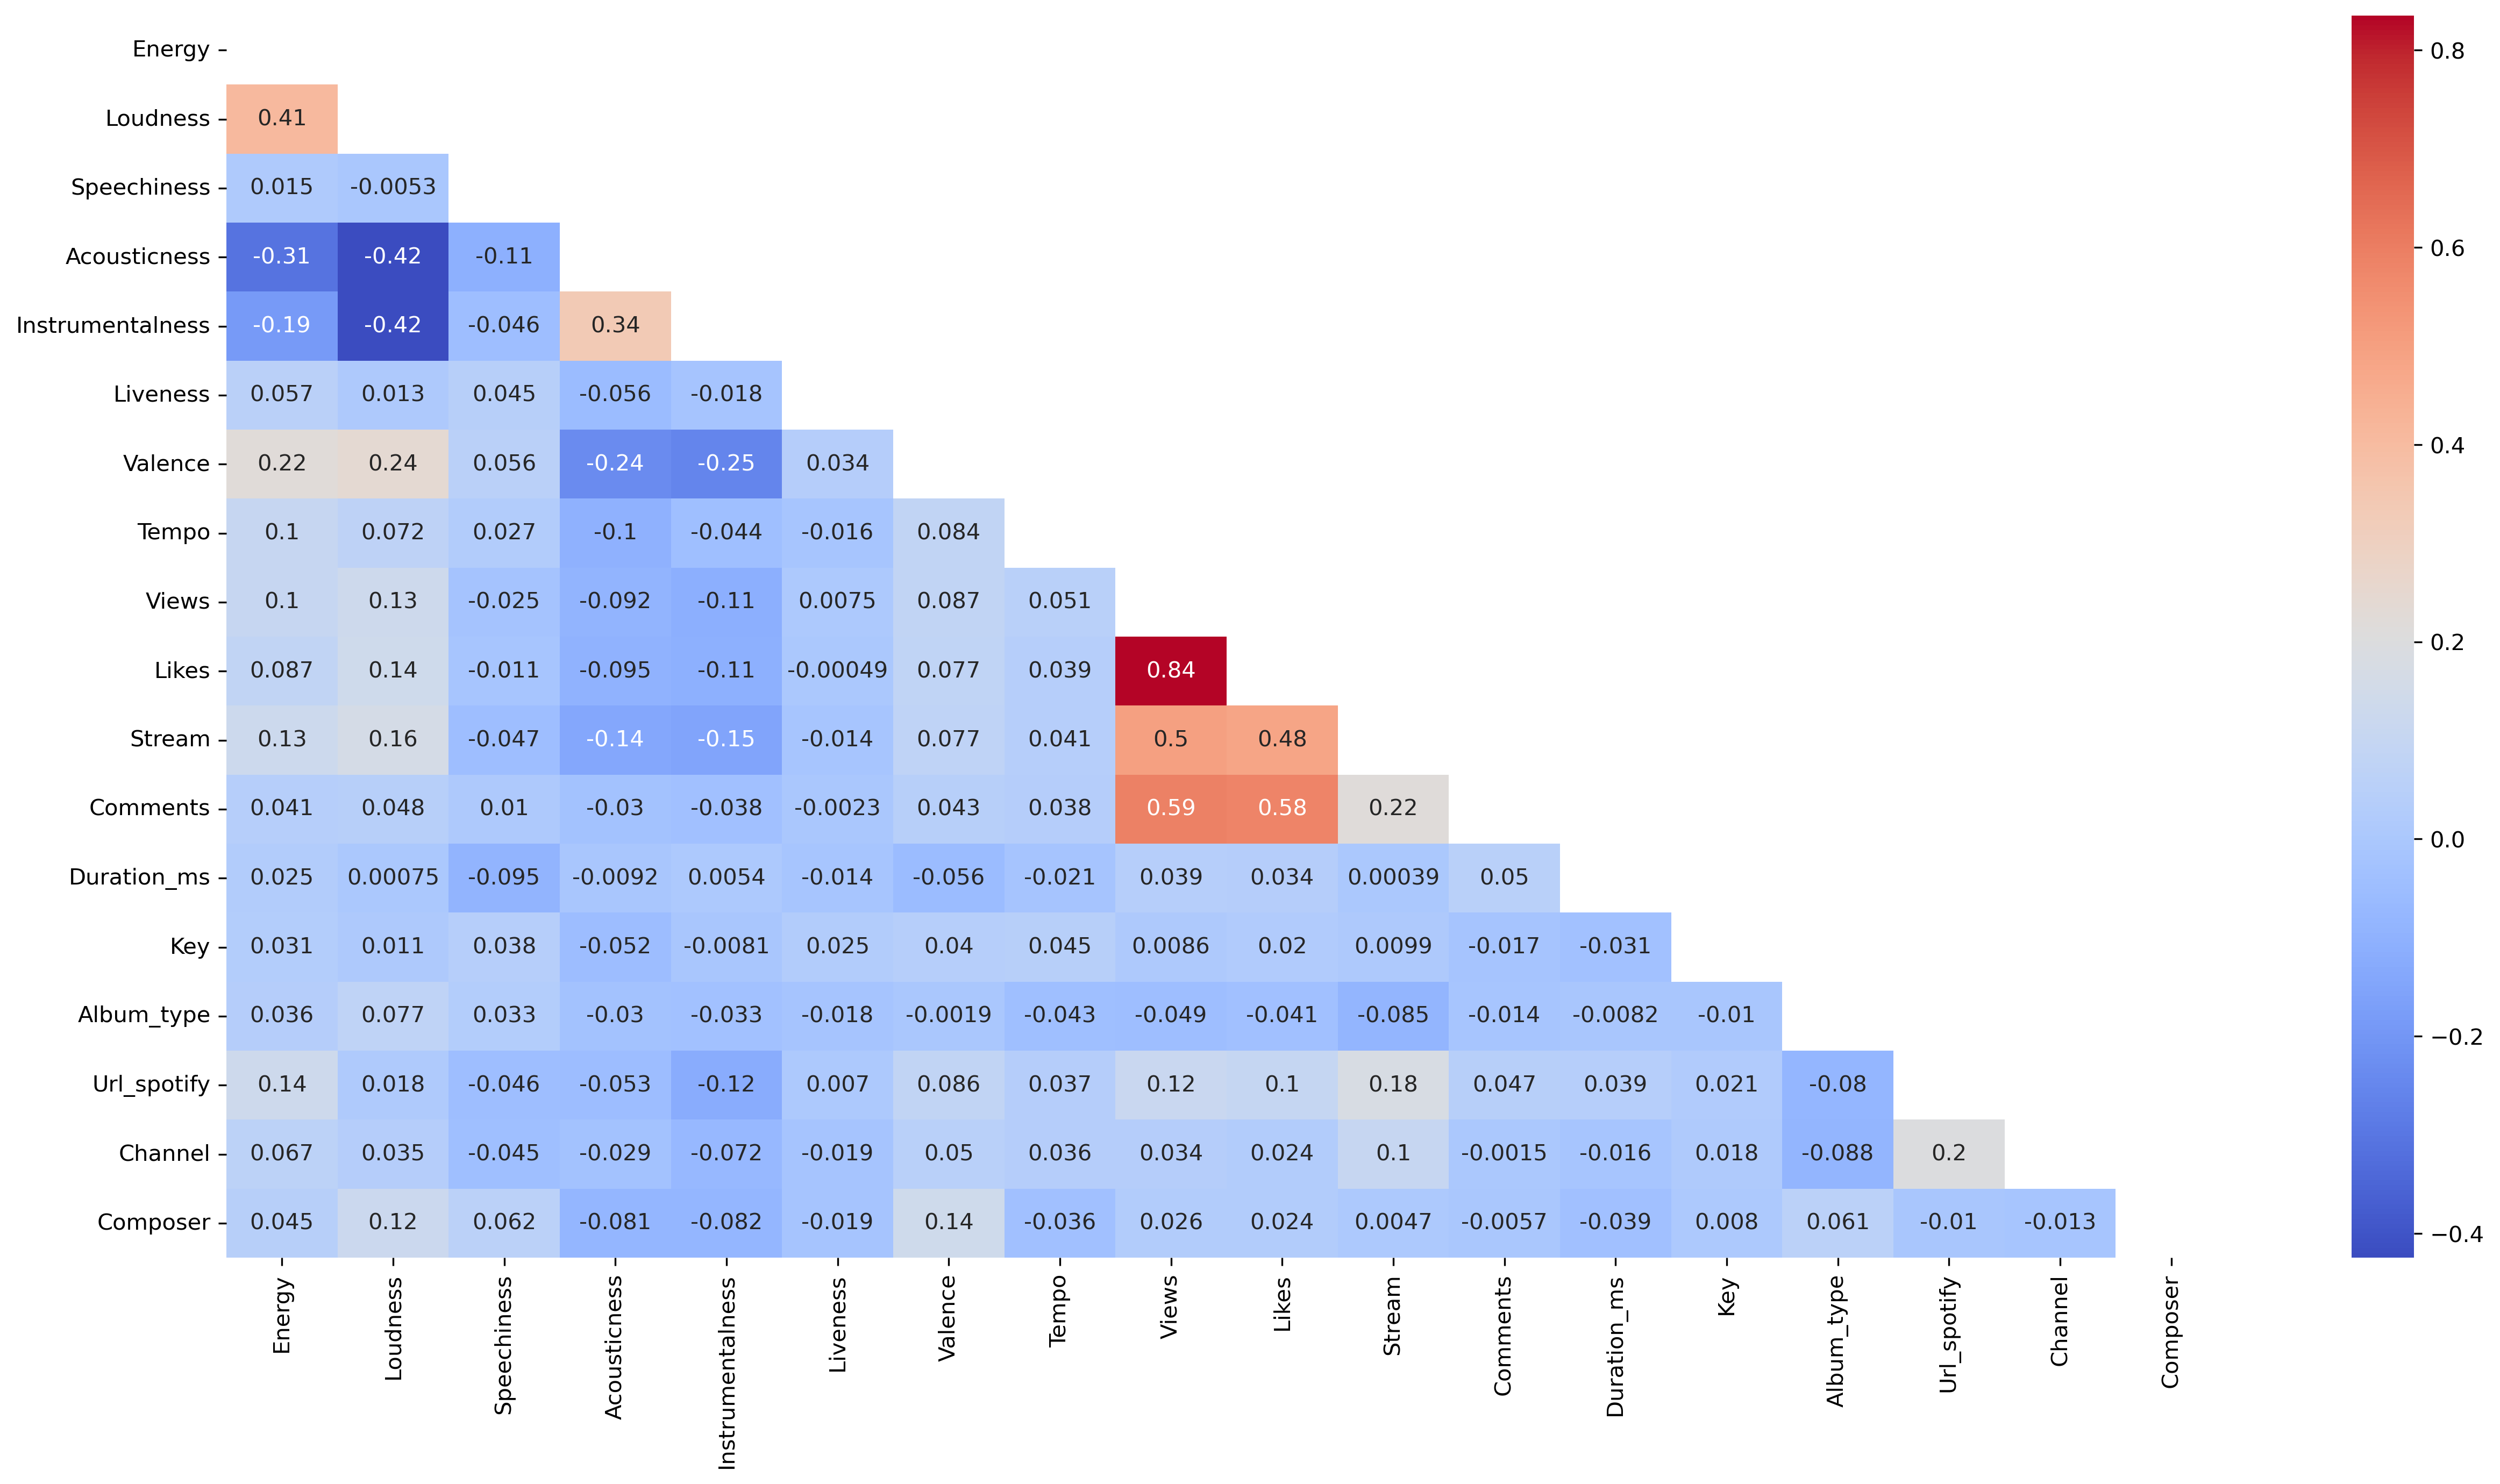

In [28]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
mask = np.triu(np.ones_like(totalNewData.corr()))
sns.heatmap(totalNewData.corr(), cmap="coolwarm", annot=True, mask=mask)

<AxesSubplot:>

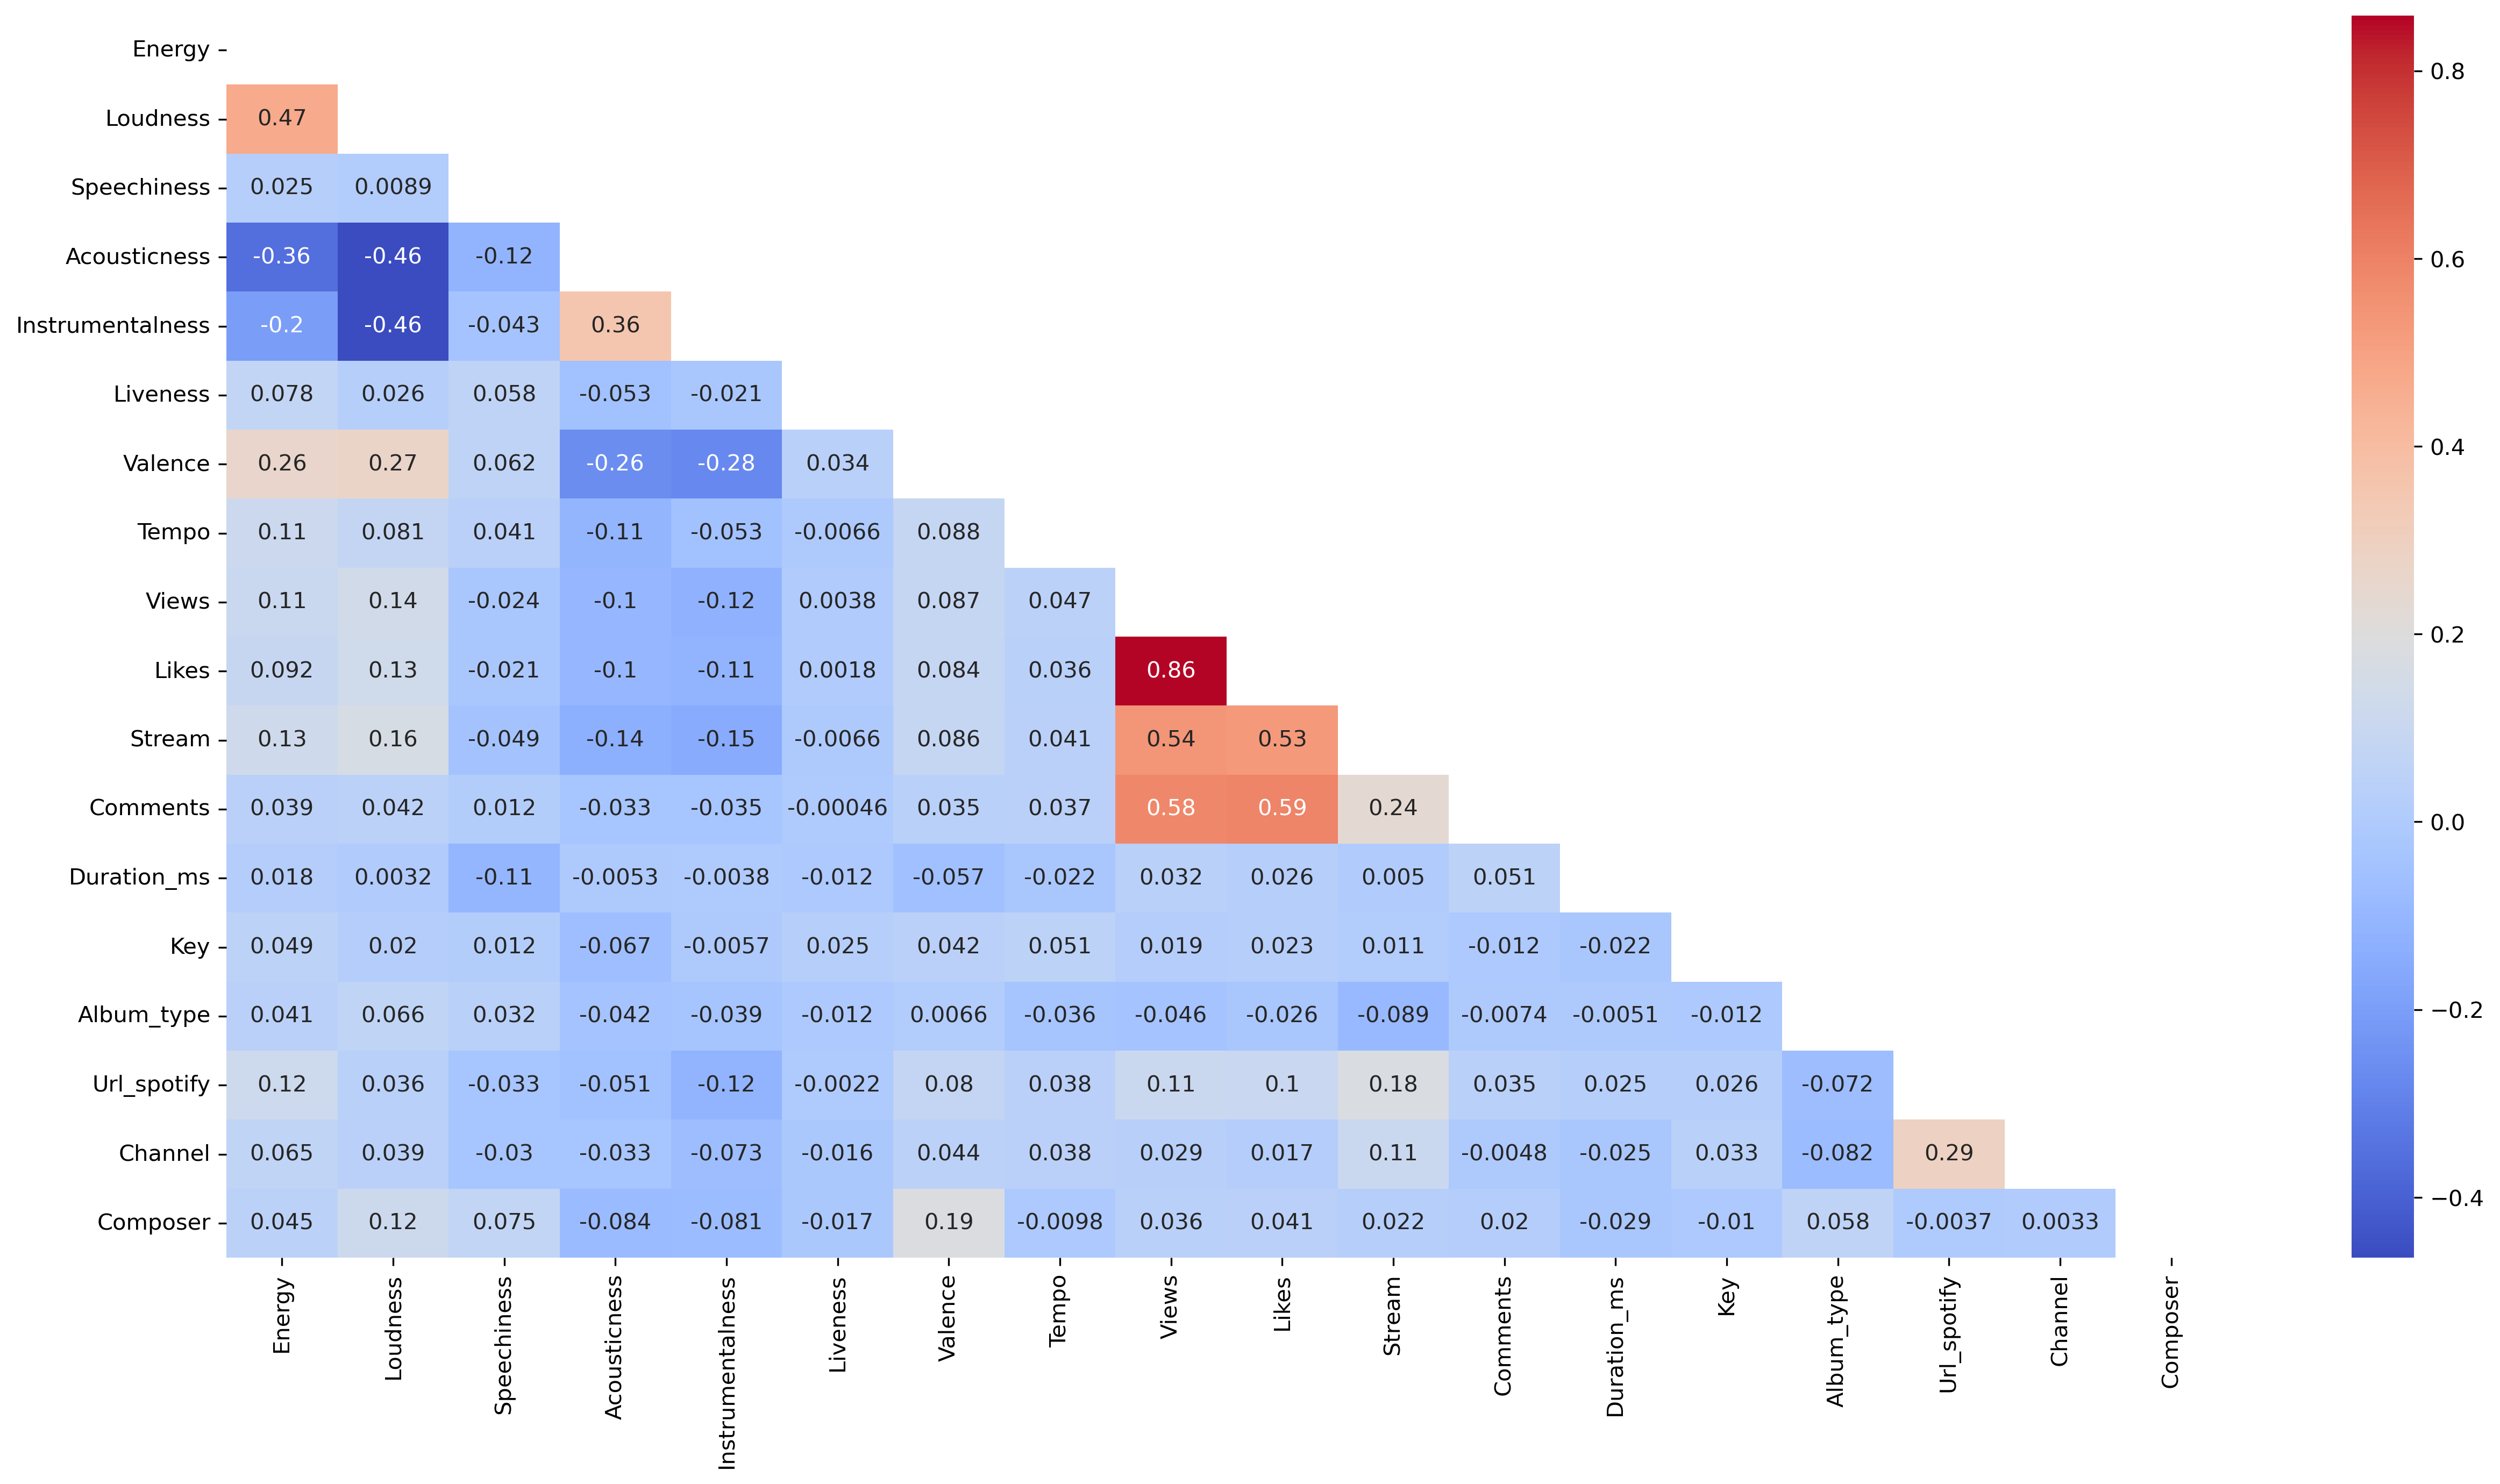

In [27]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
mask = np.triu(np.ones_like(a.corr()))
sns.heatmap(a.corr(), cmap="coolwarm", annot=True, mask=mask)

TEST SAVE MODEL IMPUTE PREDICTIONS

In [29]:
impute.savePredictions()

TEST LOAD MODEL IMPUTE PREDICTIONS

In [29]:
imputeRead = imp.testImputate(totalNewDataCopy)

In [30]:
totalNewDataCopy

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,Likes,Stream,Comments,Duration_ms,Key,Album_type,Url_spotify,Channel,Composer
id,,,,,,,,,,,,,,,,,,
17170,0.350403,-6.679000,0.177000,5.842771e-07,0.002330,0.230346,0.503058,138.559000,6.935552e+08,6.220896e+06,1.040235e+09,169907.000000,222640.000000,6.0,0.0,1824.0,1207.0,3.0
17171,0.347429,-5.815000,0.030200,3.225859e-02,0.000687,0.000099,0.852000,92.761000,7.201164e+07,8.461311e+05,3.100837e+08,31003.000000,200173.000000,8.0,0.0,1824.0,1207.0,1.0
17172,0.786330,-3.930000,0.052200,7.676563e-05,0.020704,0.001561,0.551000,108.014000,8.435055e+06,2.821420e+05,6.306347e+07,7399.000000,215150.000000,1.0,2.0,1824.0,1207.0,1.0
17173,0.403583,-5.810000,0.026000,3.442951e-15,0.509000,0.000262,0.578000,120.423000,2.333321e+08,1.788577e+06,4.346636e+08,55229.000000,233867.000000,2.0,0.0,1824.0,1207.0,5.0
17174,0.334255,-8.627000,0.171000,1.619428e-05,0.000000,0.000340,0.525000,167.953000,6.184810e+08,6.197318e+06,6.172597e+08,155930.000000,340920.000000,11.0,0.0,1223.0,1207.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,-6.366894,0.045451,3.176921e-01,0.006016,0.001642,0.160253,72.136829,9.636781e+06,5.807853e+04,1.750041e+07,168.000000,233721.956648,7.0,0.0,209.0,2970.0,6.0
23481,0.318585,-4.148566,0.073000,7.419596e-03,0.000817,0.008843,0.614366,118.522961,4.572846e+07,7.227992e+04,1.365601e+07,448.000000,138726.388393,10.0,2.0,1631.0,4731.0,7.0
23482,0.426223,-5.807545,0.072906,6.617082e-01,0.898308,0.000662,0.087281,87.969239,-3.451740e+06,2.305163e+04,1.849094e+07,239750.159018,185842.047750,5.0,2.0,1937.0,5845.0,4.0


In [31]:
totalNewDataCopy = totalNewData.copy()
imputeRead.loadPredictions()
b  = imputeRead.miceTrainedModel(totalNewDataCopy, savePredictions=True)

___ Processing Energy ___
___ Processing Loudness ___
___ Processing Speechiness ___
___ Processing Acousticness ___
___ Processing Instrumentalness ___
___ Processing Liveness ___
___ Processing Valence ___
___ Processing Tempo ___
___ Processing Views ___
___ Processing Likes ___
___ Processing Stream ___
___ Processing Comments ___
___ Processing Duration_ms ___
___ Processing Key ___
___ Processing Album_type ___
___ Processing Url_spotify ___
___ Processing Channel ___
___ Processing Composer ___
-- Imputation Done --


In [33]:
ImputeData = impute.data.copy()

In [41]:
ImputeData.to_csv('testImputed.csv')

RECOVER RAIN TEST DATA

In [43]:
trainImp = ImputeData.loc[0:len(train) - 1 ,: ]
testImpTotal = ImputeData.loc[len(train): ,: ]

In [36]:
trainImp

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,Likes,Stream,Comments,Duration_ms,Key,Album_type,Url_spotify,Channel,Composer
id,,,,,,,,,,,,,,,,,,
0,0.000273,-25.176000,0.044300,7.241508e-01,0.000062,0.000807,0.340000,83.398,1.921244e+07,1.376220e+05,1.998137e+07,3070.0,117907.0,3.0,0.0,0.0,0.0,1.0
1,0.184220,-10.662656,0.112644,6.722214e-01,0.910000,0.034966,0.746000,148.692,1.848250e+05,5.190000e+03,4.281608e+07,122.0,173427.0,7.0,0.0,0.0,1.0,1.0
2,0.046035,-15.596000,0.068766,6.676276e-01,0.867000,0.001772,0.380000,84.899,1.848250e+05,5.190000e+03,1.932081e+07,122.0,150667.0,6.0,0.0,0.0,1.0,1.0
3,0.209585,-6.251000,0.027700,3.796416e-03,0.014070,0.001000,0.441818,150.220,2.024573e+08,9.970350e+05,3.996619e+08,24350.0,265000.0,7.0,0.0,1.0,2.0,2.0
4,0.315326,-6.514057,0.026000,3.048625e-06,0.000467,0.002924,0.295000,97.997,3.166880e+08,1.299086e+06,3.383458e+08,31150.0,263867.0,5.0,0.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17165,0.794023,-6.344000,0.032800,8.991539e-02,0.000000,0.000591,0.658000,90.002,8.096105e+06,1.113000e+03,5.413247e+07,0.0,94667.0,5.0,2.0,1823.0,5190.0,1.0
17166,0.820026,-1.786000,0.153459,2.195200e-05,0.000000,0.000786,0.657000,174.869,1.647410e+05,2.019000e+03,1.089818e+07,0.0,150857.0,4.0,2.0,1823.0,5190.0,3.0
17167,0.571787,-4.679000,0.064700,2.549059e-02,0.000000,0.003652,0.419000,168.388,3.564600e+04,3.290000e+02,4.848011e+07,0.0,136842.0,4.0,2.0,1823.0,4396.0,4.0


In [37]:
partialAnswer = partialAnswer.set_index('id')

In [38]:
partialAnswer.index

Int64Index([18871, 18872, 18873, 18879, 18882, 18886, 18887, 18894, 18896,
            18899,
            ...
            23405, 23421, 23434, 23436, 23442, 23462, 23463, 23473, 23482,
            23484],
           dtype='int64', name='id', length=631)

DATA READY

In [44]:
trainImp_X = trainImp.copy()
trainImp_y = train["Danceability"].copy()

In [40]:
# trainSave = pd.concat((trainImp_X,trainImp_y), axis=1)
# trainSave.to_csv('./ImputeTrain.csv')

In [45]:
testImp_X= ImputeData[ImputeData.index.isin(partialAnswer.index)]
testImp_y =  partialAnswer.copy()

In [ ]:
# testSave = pd.concat((testImp_X,testImp_y), axis=1)
# testSave.to_csv('./ImputeTest.csv')

PREPROCESSING 

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledData = scaler.fit_transform(trainImp_X)
scaledDataPD = pd.DataFrame(scaledData, columns=trainImp_X.columns)

SHUFFLE DATA

In [47]:
from sklearn.utils import shuffle
X, y = shuffle(scaledDataPD, trainImp_y, random_state=0)

In [70]:
ScaledtestX = scaler.transform(testImp_X)
scaledDataTestPD = pd.DataFrame(ScaledtestX, columns=trainImp_X.columns)

In [71]:
scaledDataTestPD

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,Likes,Stream,Comments,Duration_ms,Key,Album_type,Url_spotify,Channel,Composer
0,1.190989,0.604743,-0.257343,-0.515717,-0.306252,-0.309733,0.500503,0.007054,0.246719,0.165730,-0.075163,-0.018552,0.283685,1.137172,-0.586632,-0.646834,-1.229453,0.411432
1,0.199628,0.292511,-0.049240,-0.458329,-0.298614,-0.029785,1.896764,0.007054,0.246719,0.168014,0.271849,-0.018552,0.096493,-0.741598,-0.586632,2.122187,-1.229453,0.411432
2,-0.805103,-0.582834,1.893869,-0.537197,0.209474,0.312910,-0.062085,-0.776946,-0.340500,-0.342771,-0.360955,-0.129621,-0.161685,0.063590,-0.586632,2.122187,2.017642,0.411432
3,-0.722285,0.010678,0.051621,-0.330365,-0.307308,-0.287051,-0.586060,-0.082620,-0.004676,0.031108,-0.469172,-0.067122,0.693780,1.137172,1.533888,-0.026226,-0.863063,-0.697445
4,-1.017759,-0.007346,-0.573097,1.535370,-0.307308,-0.309816,-0.329516,0.185138,-0.355939,-0.369336,-0.550831,-0.135618,-1.277679,1.137172,-0.586632,2.124163,0.613256,1.150682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,-0.118019,1.134598,-0.643954,0.129849,-0.232551,-0.303388,1.063037,-0.906647,-0.347590,-0.346446,-0.186625,-0.107766,-0.870607,0.331985,-0.586632,-1.083632,1.830749,-1.067070
627,-0.280767,-0.850613,0.092621,-0.504562,-0.298622,-0.302958,-0.259478,-0.616265,0.119802,-0.155119,-0.286242,-0.132856,-0.261087,-1.546785,1.533888,1.807930,0.539978,0.411432
628,0.625657,0.841429,-0.129164,0.184113,-0.297935,-0.314618,-1.037661,-1.056299,-0.327027,-0.374149,-0.541874,-0.136489,-0.258224,0.600381,-0.586632,1.280215,-1.671811,-1.067070
629,0.391831,0.393175,-0.237521,2.574688,4.604674,-0.309466,-1.906691,-1.193971,-0.371314,-0.361334,-0.475117,1.042921,-0.328721,-0.204806,1.533888,1.985811,2.207223,0.041806


In [84]:
scaledTestFile = scaler.transform(a)
scaledTestFilePD = pd.DataFrame(scaledTestFile, columns=a.columns)

In [85]:
scaledTestFilePD

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,Likes,Stream,Comments,Duration_ms,Key,Album_type,Url_spotify,Channel,Composer
0,0.065605,0.195807,0.833805,-0.537227,-0.294567,1.847906,-0.098810,0.645402,2.457721,3.212660,3.931836,0.699050,-0.006471,0.063590,-0.586632,1.762471,-0.910794,-0.327819
1,0.052810,0.391487,-0.677045,-0.385522,-0.303551,-0.314754,1.418462,-1.019749,-0.065021,0.113296,0.782572,0.015159,-0.203221,0.600381,-0.586632,1.762471,-0.910794,-1.067070
2,1.941239,0.818403,-0.450623,-0.536868,-0.194100,-0.301025,0.109653,-0.465171,-0.323068,-0.211929,-0.282868,-0.101055,-0.072063,-1.278389,1.533888,1.762471,-0.910794,-1.067070
3,0.294422,0.392619,-0.720271,-0.537229,2.475923,-0.313224,0.227054,-0.013998,0.589752,0.656758,1.319905,0.134435,0.091848,-1.009993,-0.586632,1.762471,-0.910794,0.411432
4,-0.003870,-0.245377,0.772053,-0.537153,-0.307308,-0.312492,-0.003400,1.714126,2.153007,3.199064,2.107473,0.630234,1.029342,1.405568,-0.586632,0.574618,-0.910794,-0.697445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,-0.752002,0.266493,-0.520085,0.956830,-0.274413,-0.300261,-1.589395,-1.769615,-0.318190,-0.341136,-0.479389,-0.136657,0.090577,0.331985,-0.586632,-1.429513,0.274429,0.781057
6311,-0.071295,0.768902,-0.236550,-0.502336,-0.302839,-0.232630,0.385183,-0.083080,-0.171700,-0.332947,-0.495971,-0.135278,-0.741327,1.137172,1.533888,1.381014,1.458308,1.150682
6312,0.391831,0.393175,-0.237521,2.574688,4.604674,-0.309466,-1.906691,-1.193971,-0.371314,-0.361334,-0.475117,1.042921,-0.328721,-0.204806,1.533888,1.985811,2.207223,0.041806
6313,-0.562416,-0.910543,-0.600103,-0.520154,2.381792,-0.028225,-0.186083,-0.140841,-0.287162,-0.249351,-0.037467,-0.062947,-0.374283,1.405568,-0.586632,1.495649,-1.589793,1.150682


MODELO 

In [48]:
import lightgbm as lgb

class LGBWrapper:
    def __init__(self, params=None, num_boost_round=10):
        self.params = params
        self.num_boost_round = num_boost_round
        self.model = None

    def fit(self, X, y):
        lgb_train = lgb.Dataset(X, y, free_raw_data=False)
        self.model = lgb.train(self.params, lgb_train, num_boost_round=self.num_boost_round)

    def predict(self, X):
        return self.model.predict(X)

In [49]:
# Prepare LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# For XGBRegressor parameters
default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 42,
    'n_jobs': -1
}

In [73]:
train_features = X
train_labels = y

val_features = scaledDataTestPD
val_labels = testImp_y


In [56]:
# ! pip install catboost

     -------------------------------------- 101.0/101.0 MB 4.8 MB/s eta 0:00:00


In [74]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm
from catboost import CatBoostRegressor

import pickle
regressors = [
    DecisionTreeClassifier(max_depth=None),
    ExtraTreesClassifier(),
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    CatBoostRegressor(iterations=1500, learning_rate=0.1, depth=3),
    #OneVsOneClassifier(AdaBoostClassifier(n_estimators=50, random_state=42), n_jobs=8),
    OneVsOneClassifier(ExtraTreesClassifier(), n_jobs=8), #this one works well
    #OneVsOneClassifier(XGBRegressor(**default_params), n_jobs=8),
    #OneVsOneClassifier(svm.SVC(kernel='linear'), n_jobs=8),    
    ExtraTreesClassifier(),
    #svm.SVC(kernel='rbf'),
]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])
all_preds = []

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(train_features, np.ravel(train_labels))
    pred = reg.predict(val_features)
    all_preds.append(pred)
    accuracy = accuracy_score(np.ravel(val_labels), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)

result_table

Processing Regressor: DecisionTreeClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: CatBoostRegressor
0:	learn: 2.7955963	total: 3.5ms	remaining: 5.25s
1:	learn: 2.7428830	total: 7.26ms	remaining: 5.44s
2:	learn: 2.6940921	total: 10.8ms	remaining: 5.4s
3:	learn: 2.6483353	total: 14.3ms	remaining: 5.34s
4:	learn: 2.6109882	total: 17.7ms	remaining: 5.3s
5:	learn: 2.5793755	total: 21.8ms	remaining: 5.44s
6:	learn: 2.5459427	total: 25.8ms	remaining: 5.5s
7:	learn: 2.5165606	total: 29.3ms	remaining: 5.47s
8:	learn: 2.4881321	total: 32.7ms	remaining: 5.42s
9:	learn: 2.4633133	total: 36.2ms	remaining: 5.4s
10:	learn: 2.4424690	total: 40.2ms	remaining: 5.44s
11:	learn: 2.4241447	total: 43.5ms	remaining: 5.4s
12:	learn: 2.4006361	total: 46.5ms	remaining: 5.32s
13:	learn: 2.3842209	total: 49.1ms	remaining: 5.21s
14:	

,mae,accuracy
regressors,,
DecisionTreeClassifier,2.866878,0.142631
ExtraTreesClassifier,2.694136,0.158479
LGBWrapper,2.231379,0.096672
RandomForestRegressor,2.228209,0.106181
RandomForestRegressor,2.210777,0.114105
XGBRegressor,2.202853,0.114105
CatBoostRegressor,2.201268,0.152139
OneVsOneClassifier,2.622821,0.171157
ExtraTreesClassifier,2.711569,0.156894


In [75]:
testImpTotal

,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Views,Likes,Stream,Comments,Duration_ms,Key,Album_type,Url_spotify,Channel,Composer
id,,,,,,,,,,,,,,,,,,
17170,0.350403,-6.679000,0.177000,5.842771e-07,0.002330,0.230346,0.503058,138.559000,6.935552e+08,6.220896e+06,1.040235e+09,169907.000000,222640.000000,6.0,0.0,1824.0,1207.0,3.0
17171,0.347429,-5.815000,0.030200,3.225859e-02,0.000687,0.000099,0.852000,92.761000,7.201164e+07,8.461311e+05,3.100837e+08,31003.000000,200173.000000,8.0,0.0,1824.0,1207.0,1.0
17172,0.786330,-3.930000,0.052200,7.676563e-05,0.020704,0.001561,0.551000,108.014000,8.435055e+06,2.821420e+05,6.306347e+07,7399.000000,215150.000000,1.0,2.0,1824.0,1207.0,1.0
17173,0.403583,-5.810000,0.026000,3.442951e-15,0.509000,0.000262,0.578000,120.423000,2.333321e+08,1.788577e+06,4.346636e+08,55229.000000,233867.000000,2.0,0.0,1824.0,1207.0,5.0
17174,0.334255,-8.627000,0.171000,1.619428e-05,0.000000,0.000340,0.525000,167.953000,6.184810e+08,6.197318e+06,6.172597e+08,155930.000000,340920.000000,11.0,0.0,1223.0,1207.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23480,0.160377,-6.366894,0.045451,3.176921e-01,0.006016,0.001642,0.160253,72.136829,9.636781e+06,5.807853e+04,1.750041e+07,168.000000,233721.956648,7.0,0.0,209.0,2970.0,6.0
23481,0.318585,-4.148566,0.073000,7.419596e-03,0.000817,0.008843,0.614366,118.522961,4.572846e+07,7.227992e+04,1.365601e+07,448.000000,138726.388393,10.0,2.0,1631.0,4731.0,7.0
23482,0.426223,-5.807545,0.072906,6.617082e-01,0.898308,0.000662,0.087281,87.969239,-3.451740e+06,2.305163e+04,1.849094e+07,239750.159018,185842.047750,5.0,2.0,1937.0,5845.0,4.0


In [76]:
median_preds = np.median(all_preds, axis=0)
median_accuracy = accuracy_score(np.ravel(val_labels), np.rint(median_preds))
median_mae = mean_absolute_error(np.ravel(val_labels), np.rint(median_preds))

print("Median Accuracy:", median_accuracy)
print("Median MAE:", median_mae)
print("Median Accuracy:", accuracy_score(np.ravel(val_labels), np.rint(median_preds)))

Median Accuracy: 0.1109350237717908
Median MAE: 2.2091917591125196
Median Accuracy: 0.1109350237717908


In [77]:
print("Mean Accuracy", np.mean(result_table['accuracy']), "Error", (1-np.mean(result_table['accuracy'])), "MAE", np.mean(result_table['mae']), "Error x MAE", (1-np.mean(result_table['accuracy'])) * np.mean(result_table['mae']))

Mean Accuracy 0.1347068145800317 Error 0.8652931854199684 MAE 2.441098784997359 Error x MAE 2.1122661435951793


In [78]:
print("Mean Accuracy", np.mean(result_table['accuracy']), "Error", (1-np.mean(result_table['accuracy'])), "MAE", np.mean(result_table['mae']), "Error x MAE", (1-np.mean(result_table['accuracy'])) * np.mean(result_table['mae']))

Mean Accuracy 0.1347068145800317 Error 0.8652931854199684 MAE 2.441098784997359 Error x MAE 2.1122661435951793


In [79]:

# train on the full training set
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(
        train_features,                # Full X data
        np.ravel(train_labels)       # Full Y label
    )

Processing Regressor: DecisionTreeClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: CatBoostRegressor
0:	learn: 2.7955963	total: 4.64ms	remaining: 6.96s
1:	learn: 2.7428830	total: 9.14ms	remaining: 6.85s
2:	learn: 2.6940921	total: 13.1ms	remaining: 6.55s
3:	learn: 2.6483353	total: 17.2ms	remaining: 6.43s
4:	learn: 2.6109882	total: 21.3ms	remaining: 6.38s
5:	learn: 2.5793755	total: 25.6ms	remaining: 6.37s
6:	learn: 2.5459427	total: 29.5ms	remaining: 6.29s
7:	learn: 2.5165606	total: 33.4ms	remaining: 6.24s
8:	learn: 2.4881321	total: 37.3ms	remaining: 6.18s
9:	learn: 2.4633133	total: 41.2ms	remaining: 6.13s
10:	learn: 2.4424690	total: 44.8ms	remaining: 6.07s
11:	learn: 2.4241447	total: 48.7ms	remaining: 6.04s
12:	learn: 2.4006361	total: 52.5ms	remaining: 6.01s
13:	learn: 2.3842209	total: 56.6ms	remaining: 6.01

In [80]:
def ensemble_predict(regressors, X):
    # Initialize an empty array of predictions
    predictions = np.zeros((X.shape[0], len(regressors)))

    # Generate predictions for each regressor
    for i, reg in enumerate(regressors):
        predictions[:, i] = reg.predict(X)

    # Average the predictions
    avg_predictions = predictions.mean(axis=1)
    median_predictions = np.median(predictions, axis=1)

    #return avg_predictions, predictions
    return median_predictions, predictions

# Make ensemble predictions to Validations
ensemble_predictions_l1, all_predictions = ensemble_predict(regressors, val_features)
accuracy = accuracy_score(np.ravel(val_labels), np.rint(ensemble_predictions_l1))
mae = mean_absolute_error(np.ravel(val_labels), np.rint(ensemble_predictions_l1))

print("Acc", accuracy, "Error", (1- accuracy), "MAE", mae, "Error x MAE", (1-accuracy) * mae)

Acc 0.1109350237717908 Error 0.8890649762282092 MAE 2.2091917591125196 Error x MAE 1.964115018798928


In [86]:
# Make ensemble predictions to Real TEST
ensemble_predictions_real, all_predictions = ensemble_predict(regressors, scaledTestFilePD)


In [89]:
import datetime

current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_real
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds[preds['id']==18871]

,id,Danceability
1701,18871,6
